<a href="https://colab.research.google.com/github/bioinfo-tsukuba/AdvancedCourse2021/blob/main/20210907_PM_Kagawa_%E7%AD%94%E3%81%88%E3%81%8C%E3%81%AA%E3%81%84%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1日目午後_目次
## 1. エクセルで描くと少し面倒なグラフをpythonで描いてみましょう
## 2. データを見て、グラフをpythonで描いてみましょう
### 2-1. どのように図示すると意味がありそうか、考えてみましょう
### 2-2. こだわりのグラフを、発表していただきます。作ったグラフは成果物として提出していただくので頑張ってください。
## 3. (余力のある人向け)関数をちょっと変えるだけで有意差検定がすぐにできます。調べてやってみましょう。

## 1. エクセルで描くと少し疲れるグラフをpythonで描いてみましょう

### 1-1. 2つの病院で糖尿病患者の血糖値を調べる研究を行いました。病院間で、糖尿病患者の血糖値に違いがあるか調査したい。

In [2]:
import matplotlib.pyplot as plt
import numpy as np

hospital1 = [74, 73, 81, 88, 77, 75, 47, 77, 90, 68, 61, 77, 75, 71, 76, 98, 90, 80, 81, 85]  # 病院1の患者の血糖値
hospital2 = [81, 108, 105, 91, 111, 105, 101, 107, 91, 113,  99,  99,  97, 109, 117, 106, 100, 101, 97, 95]  # 病院2の患者の血糖値

print(hospital1)

[74, 73, 81, 88, 77, 75, 47, 77, 90, 68, 61, 77, 75, 71, 76, 98, 90, 80, 81, 85]


### ヒストグラム

(array([1., 0., 1., 0., 2., 8., 3., 1., 3., 1.]),
 array([47. , 52.1, 57.2, 62.3, 67.4, 72.5, 77.6, 82.7, 87.8, 92.9, 98. ]),
 <a list of 10 Patch objects>)

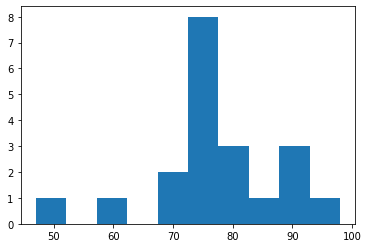

In [ ]:
横軸が検査値、縦軸が人数のヒストグラムを書いてみましょう(2時間目の復習)。余力がある人は色を変えてみましょう。

#### ヴァイオリンプロット

Text(0, 0.5, 'glucose')

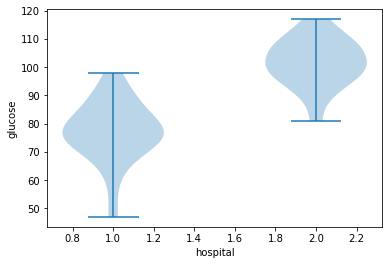

In [3]:
plt.violinplot([hospital1, hospital2])
plt.xlabel('hospital')
plt.ylabel('glucose')

#### 余力のある人向けの小課題
##### そもそもヴァイオリンプロットとは何を図示しているのかググってみましょう。
##### 箱ひげ図との違いをググってみましょう。
##### 　　　　　　　　ヴァイオリンというよりもアジの開きとかエイとか言わない

### 1-2. 1つの病院でたくさんの糖尿病患者の、血糖値とHbA1cの値を測定しました。患者は検査値のパターンでいくつかに分類できそう。

In [4]:
glu = [141, 108, 105, 91, 131, 105, 101, 137, 91, 113,  99,  99,  97, 109, 117, 106, 150, 161, 147, 135]  # 20人の患者の血糖値
HbA1c = [8.8, 4.2, 4.5, 4.9, 6.7, 6.1, 6.4, 7.5, 6.9, 6.7, 11.2, 10.2, 7.5, 7.9, 9.7, 7.1, 7.4, 8.5, 9.9, 8.7] # 20人の患者のHbA1cの値

#### 散布図

Text(0, 0.5, 'HbA1c')

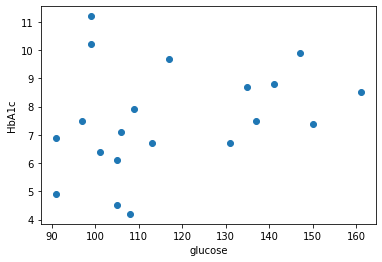

In [5]:
plt.scatter(glu,HbA1c)
plt.xlabel('glucose')
plt.ylabel('HbA1c')

Text(0, 0.5, 'HbA1c')

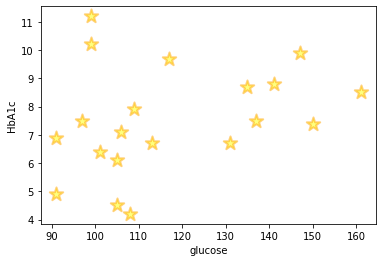

In [6]:
plt.scatter(glu,HbA1c, s= 200, c="yellow", marker="*", alpha=0.5, linewidths="2", edgecolors="orange")
plt.xlabel('glucose')
plt.ylabel('HbA1c')

マーカーを好きなものに変えてみましょう

### k-means(クラスタリング)

In [7]:
from matplotlib import pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans
import numpy as np 
import pandas as pd

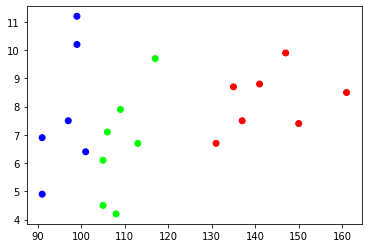

In [8]:
df = pd.DataFrame(data=[glu,HbA1c], index=['glu','HbA1c'])
df2 = df.T
#print(df2.head())

kmeans_model = KMeans(n_clusters=3, random_state=10).fit(df2)
labels = kmeans_model.labels_
#print(labels)

LABEL_COLOR_MAP = {0:'#00FF00', 1:'#FF0000', 2:'#0000FF'}
colors = [LABEL_COLOR_MAP[x] for x in labels]
plt.scatter(glu,HbA1c, c=colors)

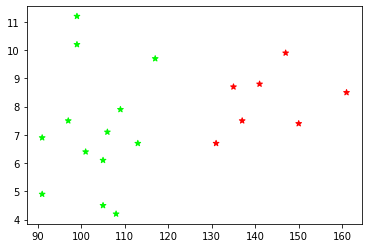

In [9]:
df = pd.DataFrame(data=[glu,HbA1c], index=['glu','HbA1c'])
df2 = df.T
#print(df2.head())

kmeans_model = KMeans(n_clusters=2, random_state=10).fit(df2)
labels = kmeans_model.labels_
#print(labels)

LABEL_COLOR_MAP = {0:'#00FA00', 1:'#FF0000'}
colors = [LABEL_COLOR_MAP[x] for x in labels]
plt.scatter(glu,HbA1c, c=colors, marker="*")

Text(0, 0.5, 'HbA1c')

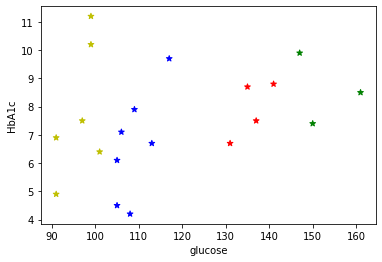

In [10]:
df = pd.DataFrame(data=[glu,HbA1c], index=['glu','HbA1c'])
df2 = df.T
#print(df2.head())

kmeans_model = KMeans(n_clusters=4, random_state=10).fit(df2)
labels = kmeans_model.labels_
#print(labels)

LABEL_COLOR_MAP = {0:'b', 1:'r', 2:'g', 3:'y'}
colors = [LABEL_COLOR_MAP[x] for x in labels]
plt.scatter(glu,HbA1c, c=colors, marker="*")
plt.xlabel('glucose')
plt.ylabel('HbA1c')

#### 発展的な内容：ネットワーク分析

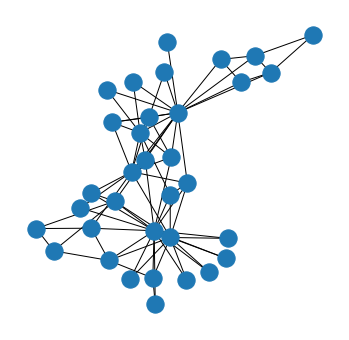

In [11]:
# networkx, matplotlib の import
import networkx as nx
import matplotlib.pyplot as plt


# グラフの構築
G = nx.karate_club_graph()

# レイアウトの取得
pos = nx.spring_layout(G)

# 可視化
plt.figure(figsize=(6, 6))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos)
plt.axis('off')
plt.show()

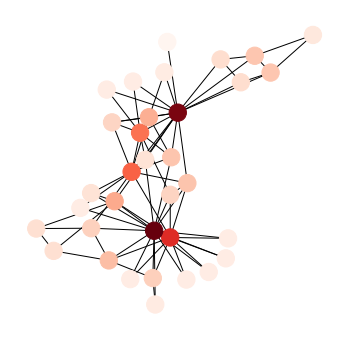

In [12]:

# pagerank の計算
pr = nx.pagerank(G)

# 可視化
plt.figure(figsize=(6, 6))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=list(pr.values()), cmap=plt.cm.Reds)
plt.axis('off')
plt.show()

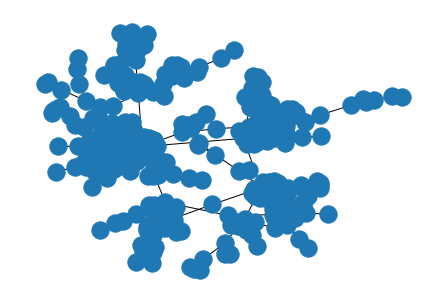

In [13]:
import networkx as nx
import community
import matplotlib.pyplot as plt

G = nx.random_graphs.powerlaw_cluster_graph(300, 1, .4)
nx.transitivity(G)

nx.draw_spring(G)


In [14]:
import networkx as nx
import community
import matplotlib.pyplot as plt

G = nx.random_graphs.powerlaw_cluster_graph(300, 1, .4)
nx.transitivity(G)

#find modularity
part = community.best_partition(G)
mod = community.modularity(part,G)

#plot, color nodes using community structure
values = [part.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show()

AttributeError: ignored

## 2. データを見て、グラフをpythonで描いてみましょう
#### 2-1. どのように図示すると意味がありそうでしょうか？
#### 2-2. どういうことに着目して、このグラフを作成したのか、発表してください。こだわりポイント、もっとこういうグラフを描きたかった、なども教えてください。
####      例：検査値Aと検査値Bには相関がありそうだったので、〜〜のグラフを作成してみた。でも、図示してみたら相関なさそうだった・・・

https://docs.google.com/spreadsheets/d/1wk7rB3RyCfYA6v11wpHnFCGdCB8MJd8JvlrRnPzmsMg/edit#gid=1557257051


https://docs.google.com/spreadsheets/d/1wk7rB3RyCfYA6v11wpHnFCGdCB8MJd8JvlrRnPzmsMg/edit?usp=sharing
##### ここを見て、気になる行のデータをコピペして使ってみましょう。
##### ヒント　　　数字の間をカンマに変えるためには、ページ上部の　編集＞検索と置換
##### 貼り付けがうまくできないときには、ctrl-v

#### 余裕がある人向け(1) 好きなcsvファイルを落としてきて読み込む
##### これができると、何万行(列)もあるデータでもプログラムで簡単に扱える(excelだとだんだん開かなくなる)
##### covid19その他東京都のcsvも楽しそう。
https://catalog.data.metro.tokyo.lg.jp/dataset

#### 余裕がある人向け(2) 擬似csvファイルを用意しました


まず、以下のファイルをご自身のgoogle driveの下にコピーしてみてください(普通にファイルをダウンロードして、ご自身のgoogle driveにあげる。)

https://drive.google.com/file/d/1IsmbnHXxmviDAi-1AKX2bebB9EHJeT15/view?
usp=sharing

1限でやった"マウント"というのを使うのです。

In [ ]:
import pandas as pd 
data= pd.read_csv('drive/My Drive/lab_data.csv') #ディレクトリの位置に気をつけて

print(data)

In [ ]:
print(data['TG'])

In [ ]:
print(data['BMI'])

In [ ]:
plt.scatter(data['BMI'],data['TG'])

#### 余裕がある人向け　有意差検定

In [ ]:
import numpy as np
from scipy import stats

stats.ttest_rel(hospital1, hospital2)

Ttest_relResult(statistic=-7.269247650835767, pvalue=6.744480849304317e-07)

#### 余力がある人向け　　ネットワーク分析を使えそうな研究課題を考えてみましょう